**Under development** -- this currently contains examples of the earlier MAD synthesis, but we have yet to reproduce it using `plenoptic`.

# Original MAD Competition

Goal here is to reproduce original MAD Competition results, as generated using the [matlab code](https://github.com/LabForComputationalVision/MAD_Competition) originally provided by Zhou Wang and then modified by the authors. MAD Competition is a synthesis method for efficiently computing two models, by generating sets of images that minimize/maximize one model's loss while holding the other's constant. For more details, see the `07_MAD_Competition` and `08_Simple_MAD` notebooks.

In [1]:
import imageio
import torch
import scipy.io as sio
import pyrtools as pt
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import plenoptic as po
import os.path as op
%matplotlib inline

%load_ext autoreload
%autoreload 2

## SSIM

Before we discuss MAD Competition, let's look a little at SSIM, since that's the metric used in the original paper, and which we'll be using here. Important to remember that SSIM is a similarity metric, so higher is better, and thus a value of 1 means the images are identical and it's bounded between 0 and 1.

We have tests to show that this matches the output of the MATLAB code, won't show here.

In [2]:
img1 = po.tools.load_images('../data/256/einstein.pgm')
img2 = po.tools.load_images('../data/256/curie.pgm')
noisy = po.tools.add_noise(img1, [2,4,8])

/Users/aldebaran/Documents/plenoptic/plenoptic/tools/data.py:90: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  im = color.rgb2gray(im)


We can see that increasing the noise level decreases the SSIM value, but not linearly

In [3]:
po.metric.ssim(img1, noisy)

/Users/aldebaran/Documents/plenoptic/plenoptic/metric/perceptual_distance.py:40: UserWarning: dynamic_range is 1 but image range falls outside [0, 1] img1: tensor([0.0039, 1.0000]), img2: tensor([-12.0457,  12.5794]). Continuing anyway...
  warnings.warn("dynamic_range is 1 but image range falls outside [0, 1]"


tensor([[0.0029],
        [0.0015],
        [0.0006]])

And that our noise level does match the MSE

In [4]:
po.metric.mse(img1, noisy)

tensor([[2.0000],
        [4.0000],
        [8.0000]])

## MAD Competition

Eventually we'll recreate these results, but not right now. For now, these results can be found in a tarball [on the OSF](https://osf.io/jwcsr/), which the following block will download into the `../data` directory.

In [5]:
# we have a helper function for downloading files from our OSF page in the test suite
import sys
sys.path.append('../tests/')
from test_metric import osf_download
results_dir = osf_download('MAD_results.tar.gz')
osf_download('ssim_images.tar.gz')

'/Users/aldebaran/Documents/plenoptic/tests/../data/ssim_images'

The following figure shows the results of MAD Competition synthesis using the original MATLAB code. It shows the original image in the top left. We then added some Gaussian noise (with a specified standard error) to get the image right below it. The four images to the right of that are the MAD-synthesized images. The first two have the same mean-squared error (MSE) as the first image (and each other), but the best and worst SSIM value (SSIM is a similarity metric, so higher is better), while the second two have the same SSIM as the first image, but the best and worst MSE. By comparing these images, we can get a sense for what MSE and SSIM consider important for image quality.

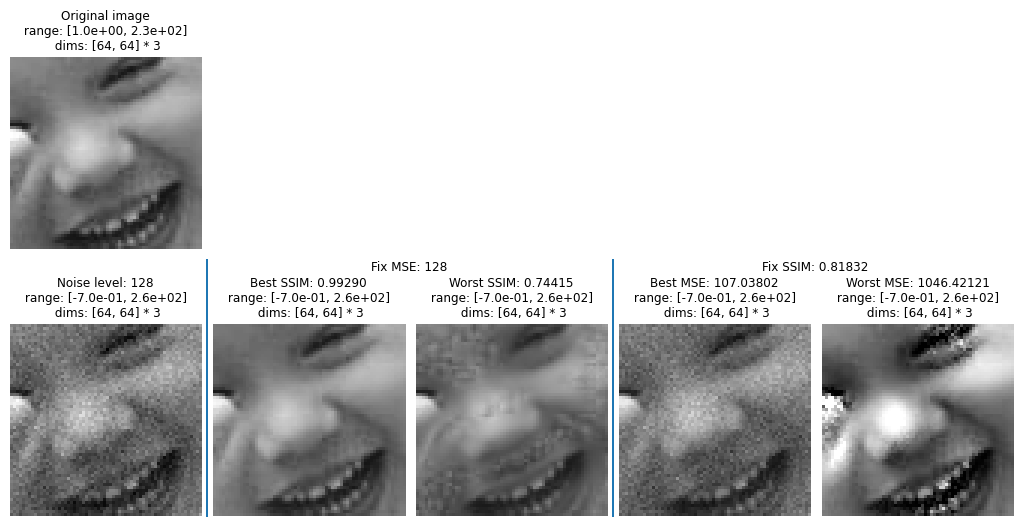

In [6]:
fig, results = po.tools.external.plot_MAD_results('samp6', [128], results_dir=results_dir, vrange='row1', zoom=3)

There's lots of info here, on the outputs of the MATLAB synthesis. We will later add stuff to investigate this using `plenoptic`.

In [7]:
results

{'L128': {'FIX_MSE': 128,
  'FIX_SSIM': 0.7735827815185419,
  'mse_fixmse_maxssim': array([128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128.]),
  'ssim_fixmse_maxssim': array([0.78662261, 0.80209889, 0.82022919, 0.84059707, 0.86155803,
         0.88088954, 0.89727039, 0.91051589, 0.92100997, 0.92940474,
         0.9362193 , 0.94185083, 0.94659523, 0.95063439, 0.954132